Description : predict the survival of passenger in titanic dataset

In [15]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Loading Titanic Dataset
titanic = sns.load_dataset('titanic')

In [24]:
#print first five rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [18]:
#analysing the dataset(count rows and columns in dataset)
#891 passengers on the ship
titanic.shape

(891, 15)

In [19]:
#statistics on numerical values
#helps to identify missing values and analyse the columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#count number of survivors on ship (0 not survived 1 survived)
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

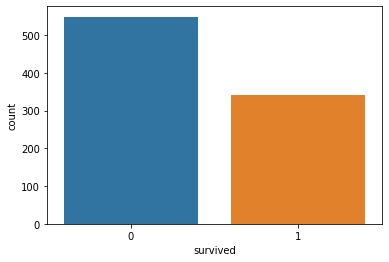

In [21]:
#visualize the count of survivors in bar graph
sns.countplot(titanic['survived'])

count for other columns 
sex - male /female
who = man/woman/child 
pclass = number corresponding to class in which passenger boarded
sibsp = number of sibling or spouse with passenger
parch =  parents or children on ship with passenger
embark_town = from where the passenger is ..

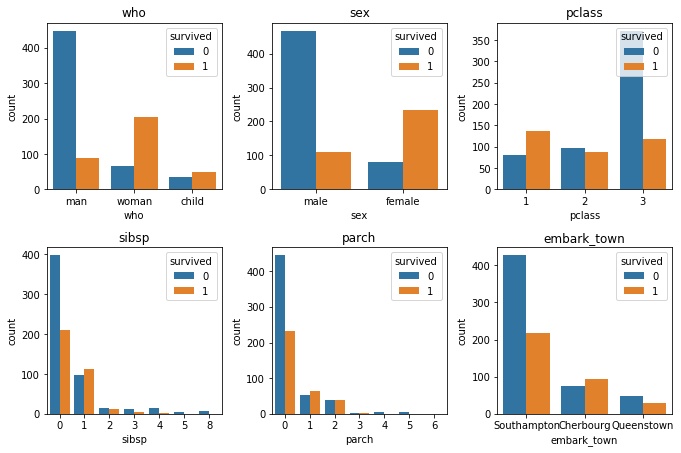

In [32]:
#list of all column name which we want to analyse and visualize them
#analyze the pattern of survival
cols = ['who','sex','pclass','sibsp','parch','embark_town']
n_rows = 2  #to get 6 charts we used 2 rows and 3 columns
n_cols = 3

#the subplot grid and figure size of each graph
fig,axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))
#returns fig and axes object
for r in range(0,n_rows):
    for c in range(0,n_cols):
        
       i = r*n_cols + c #index to go through the number of columnns
       ax = axs[r][c] #to show where to position each sub plot
       sns.countplot(titanic[cols[i]],hue = titanic['survived'],ax=ax)
       ax.set_title(cols[i])
       ax.legend(title='survived', loc = 'upper right')
                     
plt.tight_layout()       

In [37]:
#survival rate by sex percentage
titanic.groupby('sex')[['survived']].mean()*100 

,survived
sex,
female,74.203822
male,18.890815


In [40]:
#survival rate by sex and class percentage
titanic.pivot_table('survived', index='sex',columns='class')*100

class,First,Second,Third
sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


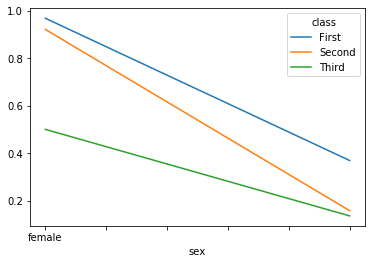

In [44]:
#looking visually at survival rate by sex and class
titanic.pivot_table('survived', index='sex',columns='class').plot()

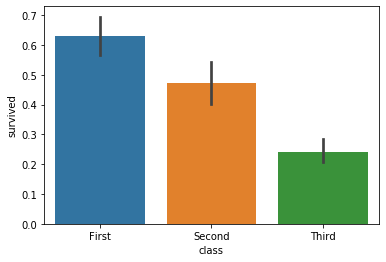

In [48]:
#plot survival rate of each class and analyse the data
sns.barplot(x='class',y='survived',data=titanic)

In [54]:
#survival rate by sex , age, and class
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')*100

class                First      Second      Third
sex    age                                       
female (0, 18]   90.909091  100.000000  51.162791
       (18, 80]  97.297297   90.000000  42.372881
male   (0, 18]   80.000000   60.000000  21.568627
       (18, 80]  37.500000    7.142857  13.366337

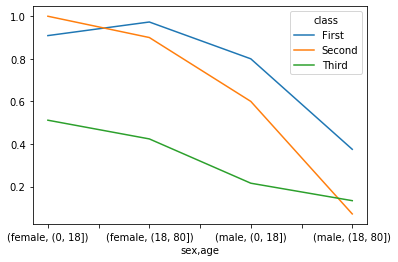

In [53]:
#visualize above output
titanic.pivot_table('survived',['sex',age],'class').plot()

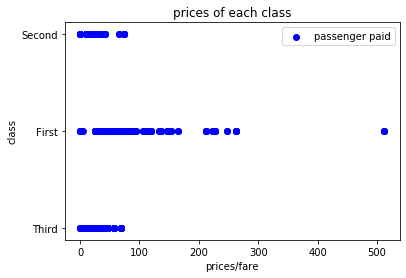

In [60]:
#pricing for the classes(plot the prices)
#dots are passengers
plt.scatter(titanic['fare'],titanic['class'],color='blue',label='passenger paid')
plt.ylabel('class')
plt.xlabel('prices/fare')
plt.title('prices of each class')
plt.legend()
plt.show()

In [63]:
#check empty values in cols 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
#look at all of the values in each column and get count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [73]:
#get redundant columns out of dataset
#titanic = titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)
#remove rows with missing values
titanic = titanic.dropna(subset = ['embarked','age'])
titanic.shape

(712, 8)

In [74]:
#look at datatypes and change the object value to number values
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode the object values to number values
titanic.iloc[:,2] =labelencoder.fit_transform(titanic.iloc[:,2].values)

titanic.iloc[:,7] =labelencoder.fit_transform(titanic.iloc[:,7].values)

In [81]:
#print unique values in the columns
print("sex=",titanic['sex'].unique())
print("embarked=",titanic['embarked'].unique())

sex= [1 0]
embarked= [2 0 1]


In [82]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [85]:
#split the data into independent x and dependent y variables
#leave survived col to make prediction

X = titanic.iloc[:,1:8].values 
Y = titanic.iloc[:,0].values #leaving target col to y 

In [86]:
#create training sets 80% training 20% testing

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [87]:
#Scale the date 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [105]:
#Create a function with many maching learning model 

def models(X_train,Y_train):
    
    #use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train,Y_train)
    
    #use KNN(k nearest neighbors)
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors = 5 ,metric = 'minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #use Support vector classifier(linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #use svc(rbf kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #using decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state = 0 )
    forest.fit(X_train,Y_train)
    
    #print the training accuracy for each model 
    print('[0]Logistic Regression Training Training Accuracy :', log.score(X_train,Y_train)*100)
    print('[1]KNN(k nearest neighbors) Training Accuracy :', knn.score(X_train,Y_train)*100)
    print('[2]SVC(linear kernel) Training Accuracy :', svc_lin.score(X_train,Y_train)*100)
    print('[3]SVC (rbf) Training Accuracy :', svc_rbf.score(X_train,Y_train)*100)
    print('[4]GaussianNB Training Accuracy:', gauss.score(X_train,Y_train)*100)
    print('[5]decision tree Training Accuracy:', tree.score(X_train,Y_train)*100)
    print('[6]RandomForestClassifier Training Accuracy:', forest.score(X_train,Y_train)*100)
   
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [106]:
#get and train all the model
model = models(X_train,Y_train)

[0]Logistic Regression Training Training Accuracy : 79.78910369068541
[1]KNN(k nearest neighbors) Training Accuracy : 86.64323374340948
[2]SVC(linear kernel) Training Accuracy : 77.68014059753953
[3]SVC (rbf) Training Accuracy : 85.06151142355009
[4]GaussianNB Training Accuracy: 80.31634446397187
[5]decision tree Training Accuracy: 99.29701230228471
[6]RandomForestClassifier Training Accuracy: 97.53954305799648


In [112]:
#create a confusing matrix to get model on testing data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract the true negative , false positive , false negative, true positive
    tn,fp,fn,tp = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    test_score = (tp+tn)/(tp+tn+fp+fn)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [117]:
#get feature importance
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance' : np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


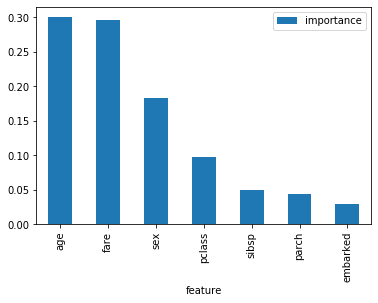

In [118]:
#visualize the importances
importances.plot.bar()

In [121]:
#print the prediction of the random forest classifier model
pred = model[6].predict(X_test)
print(pred)

print()

print(Y_test) 

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [140]:
#prediction on myself
#pclass sex age sibs parch fare embarked      

my_survival = [[1, 0, 22, 0, 0, 150, 0 ]]

#scaling bcoz we scaled train and test dataset X  
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#print prediction of my survival using RFC
pred = model[6].predict(my_survival_scaled)
print(pred)
if pred == 0 :
    print("you died on titanic")
else :
    print("your survived on titanic")

[0]
you died on titanic


In [137]:
import pickle

In [138]:
pickle.dump(forest,open("survival_prediction.sav","wb"))